# **🌐 FIAP GLOBAL SOLUTION 2025 - 2º SEMESTRE**
## 🐍 Dynamic Programing

### **👥 Integrantes (2ESPH):**

```
RM 556197 | Caio Felipe de Lima Bezerra
RM 555490 | Marcos Vinícius da Silva Costa
RM 554736 | Rafael Federici de Oliveira
```

### **🎯 Objetivo do Relatório:**
Implementar, executar e analisar os resultados dos desafios propostos na GS de Dynamic Programming:

- **DESAFIO 01:** Caminho de Valor Máximo
- **DESAFIO 02:** Verificação Crítica
- **DESAFIO 03:** Pivô Mais Rápido
- **DESAFIO 04:** Trilhas Paralelas
- **DESAFIO 05:** Recomendar Próximas Habilidades

## **⬇️ IMPORTS:**

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from collections import Counter

from data.dados import dic_skills as SKILLS
from desafios.d1.runner import executarDesafio1
from desafios.d2.runner import executarDesafio2

## **🧩 DADOS:**

In [6]:
df = pd.DataFrame(SKILLS).T
df

,Nome,Tempo,Valor,Complexidade,PreRequisito,UsoPrincipal
S1,Programacao Basica (Python),80,3,4,[],Base
S2,Modelagem de Dados (SQL),60,4,3,[],Base
S3,Algoritmos Avancados,100,7,8,[S1],Critica (HC1)
S4,Fundamentos de Machine Learning,120,8,9,"[S1, S3]",Nao Critica
S5,Visualizacao de Dados (BI),40,6,5,[S2],Critica (HC2)
S6,IA Generativa Etica,150,10,10,[S4],Objetivo Final
S7,Estruturas em Nuvem (AWS/Azure),70,5,7,[],Critica (HC3)
S8,APIs e Microsservicos,90,6,6,[S1],Critica (HC4)
S9,DevOps & CI/CD,110,9,8,"[S7, S8]",Critica (HC5)
H10,Seguranca de Dados,60,5,6,[],Lista Grande


## **DESAFIO 01: Caminho de Valor Máximo**

**Objetivo:** Encontrar a sequência de habilidades (do estado atual até S6) que maximize o Valor
Esperado sob restrições T ≤ 350h e Cumulativo de Complexidade C ≤ 30.

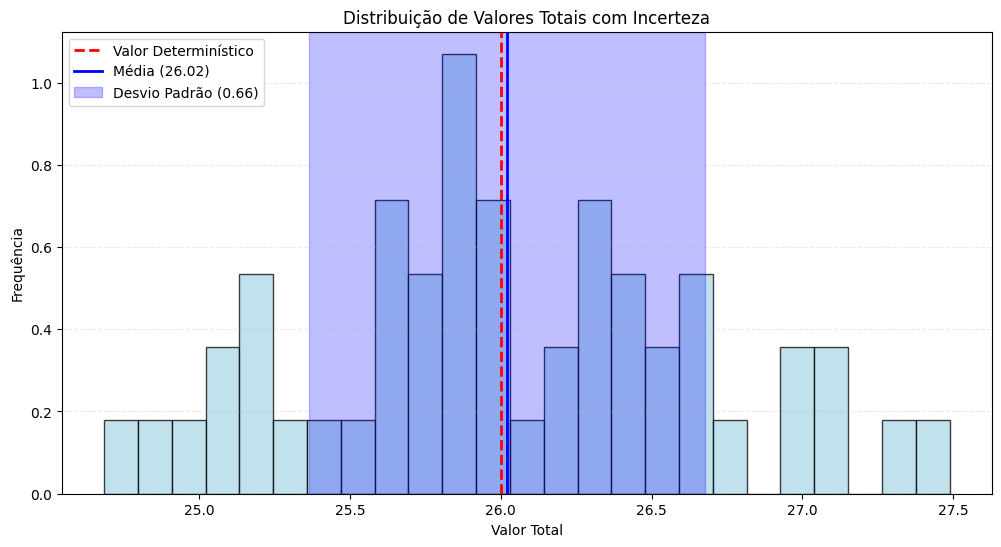

In [7]:
resultado_d1 = executarDesafio1(runs=1000, seed=42)

mc = resultado_d1['Calcular_Incerteza']
vals = mc['Amostras']
media = np.mean(vals)
desvio = np.std(vals)
valor_det = resultado_d1['Solucao_Deterministica']['Melhor_Sem_Alvo']['Valor']

plt.figure(figsize=(12, 6))
plt.hist(vals, bins=25, color='lightblue', edgecolor='black', alpha=0.75, density=True)
plt.axvline(valor_det, color='red', linestyle='--', linewidth=2, label=f'Valor Determinístico')
plt.axvline(media, color='blue', linestyle='-', linewidth=2, label=f'Média ({media:.2f})')
plt.axvspan(media - desvio, media + desvio, color='blue', alpha=0.25, label=f'Desvio Padrão ({desvio:.2f})')
plt.title('Distribuição de Valores Totais com Incerteza')
plt.xlabel('Valor Total')
plt.ylabel('Frequência')
plt.legend(loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.25)
plt.show()

## **CONCLUSAO - DESAFIO 01**

### RESULTADO DETERMINÍSTICO:

Os algoritmos feitos para o DESAFIO 01 analisaram se era possível atingir a skill S6 (IA Generativa Ética) respeitando certas restrições.

- Tempo ≤ 350 horas
- Complexidade ≤ 30

Porém, o conjunto mínimo para incluir S6 {S1, S3, S4, S6} ultrapassa os limites das restrições. Logo, e impossível incluir S6 na solução ótima.

Assim, fizemos uma solução ótima sem incluir o alvo, que resultou em:

- Valor Total = 26
- Tempo = 340 horas
- Complexidade = 28
- Conjunto = {S1, S2, S5, S7, H10, H12}

### RESULTADO COM INCERTEZA:

A simulação (Monte Carlo) executa 1000 cenários onde cada valor (V) é testado aleatoriamente

```V ​∼ Uniforme (V​−10%, V​+10%)```

Para cada cenário, o valor total do mesmo conjunto ótimo é recalculado.

Isso gera 1000 valores de "Valor Total", formando uma distribuição estatística.

O gráfico mostra que a os "Valores Totais" sob incerteza tem uma variação pequena, com a maior parte das simulações concentrada entre 25,5 e 26,5, confirmando a precisão da solução determinística.

## **DESAFIO 02: Verificação Crítica**

**Objetivo:** Considerando as 5 Habilidades Críticas (S3, S5, S7, S8, S9), enumerar as 120
permutações e calcular o custo total (Tempo de Aquisição + Espera por pré-requisitos).

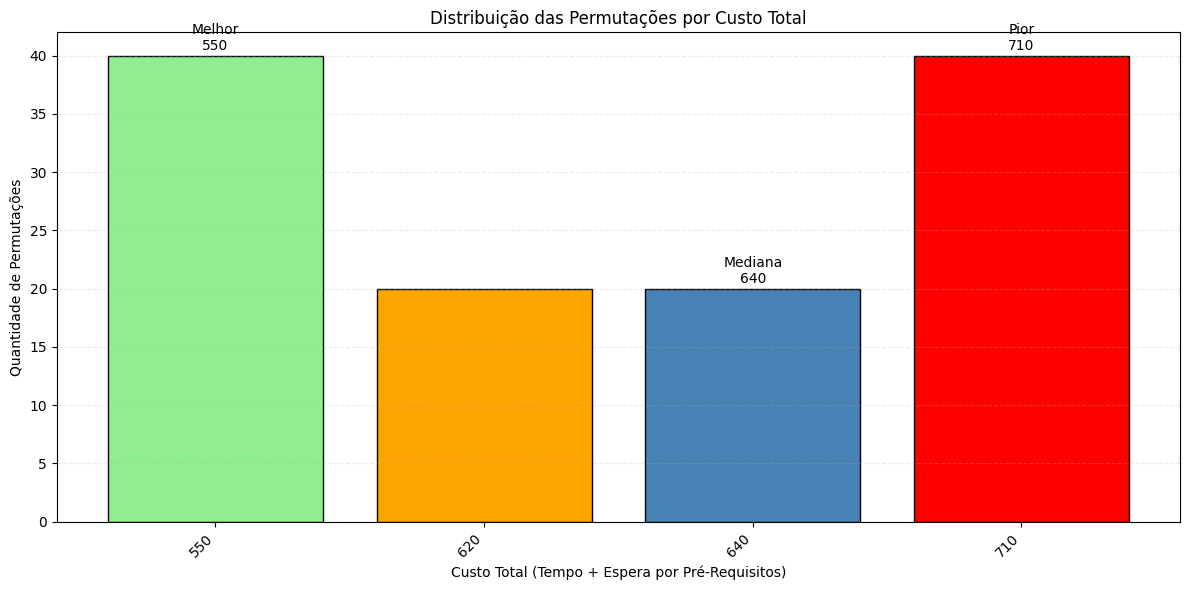

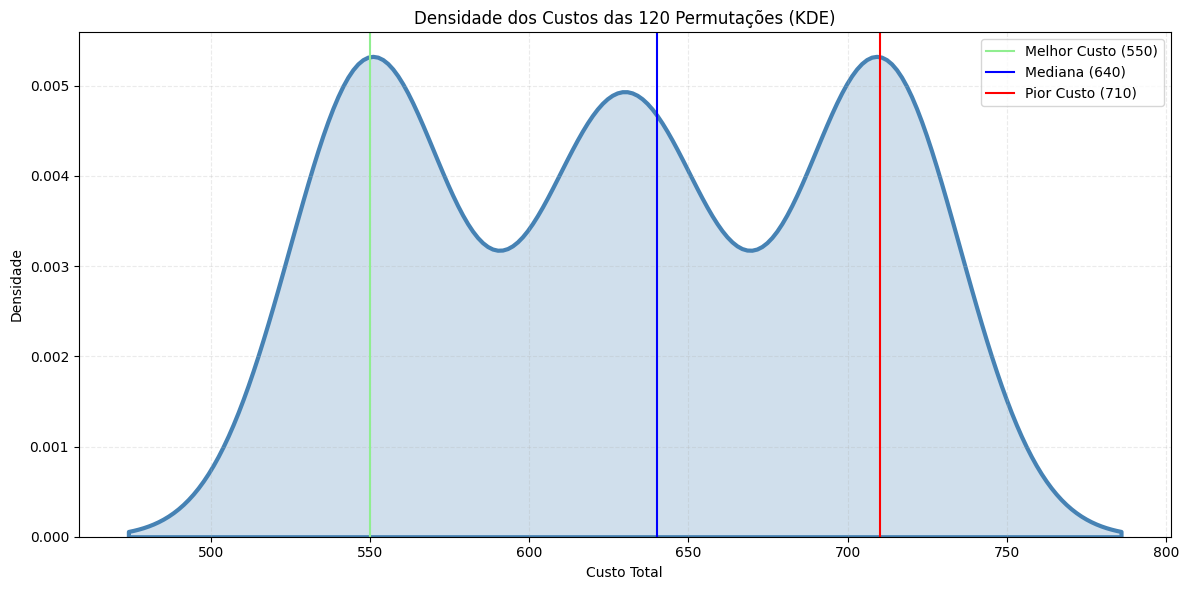

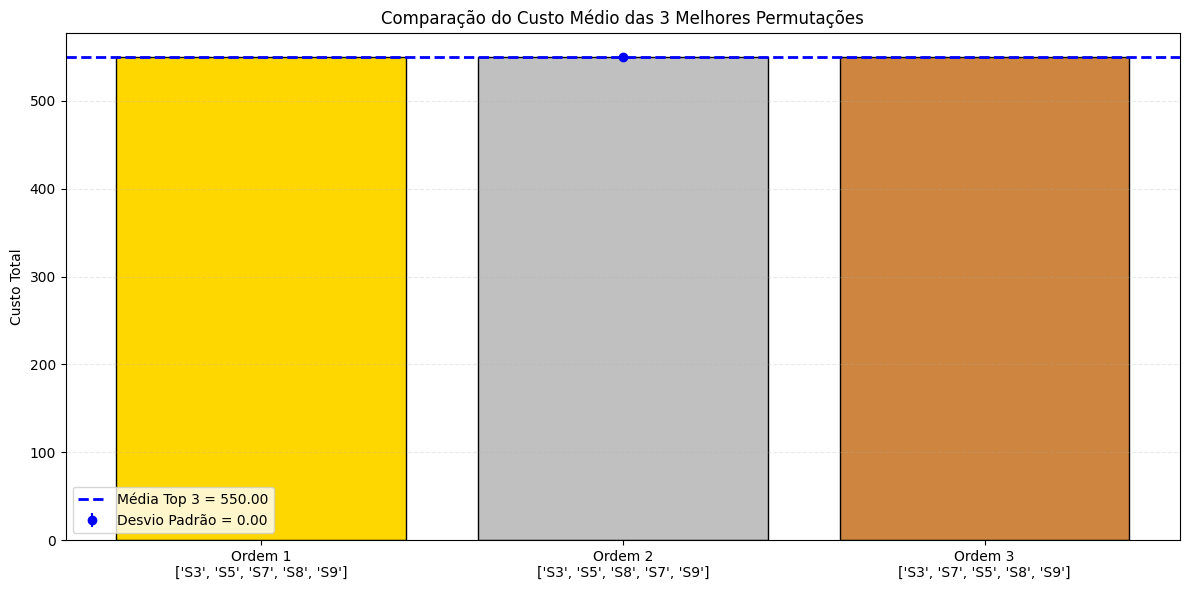

In [8]:
resultado_d2 = executarDesafio2()

perms_info = resultado_d2['Permutacoes_e_Custos']

# Plot de barras dos custos
if not perms_info['OK']:
    print('Erro:', perms_info['Erros'])
else:
    perms = perms_info['Permutacoes']
    custos = [p['Custo'] for p in perms]
    contagem = Counter(custos)
    custos_unicos = sorted(contagem.keys())
    qtdes = [contagem[c] for c in custos_unicos]
    melhor = custos_unicos[0]
    mediana = custos_unicos[len(custos_unicos)//2]
    pior = custos_unicos[-1]
    colors = []
    for c in custos_unicos:
        if c == melhor:
            colors.append('lightgreen')
        elif c == pior:
            colors.append('red')
        elif c == mediana:
            colors.append('steelblue')
        else:
            colors.append('orange')

    plt.figure(figsize=(12, 6))
    x = np.arange(len(custos_unicos))
    plt.bar(x, qtdes, color=colors, edgecolor='black')
    plt.xticks(x, custos_unicos, rotation=45, ha='right')
    plt.ylabel('Quantidade de Permutações')
    plt.xlabel('Custo Total (Tempo + Espera por Pré-Requisitos)')
    plt.title('Distribuição das Permutações por Custo Total')

    for i, c in enumerate(custos_unicos):
        if c == melhor:
            plt.text(i, qtdes[i] + 0.5, f'Melhor\n{c}', ha='center', color='black')
        elif c == mediana:
            plt.text(i, qtdes[i] + 0.5, f'Mediana\n{c}', ha='center', color='black')
        elif c == pior:
            plt.text(i, qtdes[i] + 0.5, f'Pior\n{c}', ha='center', color='black')

    plt.grid(axis='y', linestyle='--', alpha=0.25)
    plt.tight_layout()
    plt.show()

# Plot KDE dos custos
if perms_info['OK']:
    custos = [p['Custo'] for p in perms_info['Permutacoes']]
    plt.figure(figsize=(12, 6))
    sns.kdeplot(custos, fill=True, color='steelblue', linewidth=3)
    melhor = min(custos)
    mediana = sorted(custos)[len(custos)//2]
    pior = max(custos)
    plt.axvline(melhor, color='lightgreen', linestyle='-', label=f'Melhor Custo ({melhor})')
    plt.axvline(mediana, color='blue', linestyle='-', label=f'Mediana ({mediana})')
    plt.axvline(pior, color='red', linestyle='-', label=f'Pior Custo ({pior})')
    plt.title('Densidade dos Custos das 120 Permutações (KDE)')
    plt.xlabel('Custo Total')
    plt.ylabel('Densidade')
    plt.grid(linestyle='--', alpha=0.25)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot comparativo das 3 melhores permutações
if perms_info['OK']:
    perms = perms_info['Permutacoes']
    top3 = perms[:3]  
    custos_top3 = [p['Custo'] for p in top3]
    ordens_top3 = [p['Ordem'] for p in top3]
    media = np.mean(custos_top3)
    desvio = np.std(custos_top3)
    plt.figure(figsize=(12, 6))
    x = np.arange(3)
    plt.bar(x, custos_top3, color=['gold', 'silver', 'peru'], edgecolor='black')
    plt.axhline(media, color='blue', linestyle='--', linewidth=2, label=f'Média Top 3 = {media:.2f}')
    plt.errorbar(1, media, yerr=desvio, fmt='o', color='blue', label=f'Desvio Padrão = {desvio:.2f}')
    plt.xticks(x, [f'Ordem {i+1}\n{ordens_top3[i]}' for i in range(3)])
    plt.ylabel('Custo Total')
    plt.title('Comparação do Custo Médio das 3 Melhores Permutações')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.25)
    plt.tight_layout()
    plt.show()


## **CONCLUSAO - DESAFIO 02**

### ANÁLISE DAS PERMUTAÇÕES:

Os algoritmos feitos para o DESAFIO 02 analisaram 120 permutações possíveis das 5 skills críticas (S3, S5, S7, S8, S9), analisou e comparou as quais tinham os menores custos totais.

Analisando os dois primeiros graficos, temos:

- Há uma distribuição assimétrica entre os resultados das permutações, com ~33,3% (40) atingindo o valor ótimo e os outros ~66,6% (80) atingindo valores medianos ou altos demais.
- Essa distribuição mostra que a ordem das skill escolhidas importa significativamente, o que reforça a relevância de uma escolha correta da sequência.

### COMPARAÇÃO DOS 3 MELHORES RESULTADOS:

As 3 melhores permutações possuem o mesmo custo médio, o que indica que pequenas variações na ordem estipulada nçao impactam significativamente no resultado.

A média próxima do valor ótimo e o desvio padrão próximo de 0, reforçam que as 3 permutações sçao estaveis e seguem um padrão de estruturação.

